In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
diabetes=pd.read_csv("diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X= diabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].values
y=diabetes[['Outcome']].values

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614, 1)
(154, 1)


In [7]:
# Il faut faire un reshape pour les données d'entrainement et de test
# Vu que les données sont uni-dimensionels il faut plutot utiliser une convolution 1D
# Donc un reshape pour Convolution 1D

X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1) 

# Maintenant voici leur nouvelle forme
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8, 1)
(154, 8, 1)
(614, 1)
(154, 1)


In [8]:
#CNN: 1 convolution layer - 1 Pooling - MLP 

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D
from keras import regularizers
import keras
from sklearn.model_selection import cross_val_score

model_cnn = Sequential()
model_cnn.add(Conv1D(16, kernel_size=2, activation='relu', input_shape=(8,1), data_format = 'channels_last'))
model_cnn.add(Conv1D(24, kernel_size=2, strides=1,activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=1, padding='same'))
#model_cnn.add(Dropout(0.25))
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1))
#model_cnn.add(Dropout(0.3))

model_cnn.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

model_cnn.summary()
history=model_cnn.fit(X_train, y_train, batch_size=10, epochs=100,validation_data=(X_test, y_test))
loss, accuracy = model_cnn.evaluate(X_test, y_test, batch_size=None, verbose=1)
print("Test Accuracy: {:.4f}".format(accuracy))    

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 7, 16)             48        
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 6, 24)             792       
_________________________________________________________________
dropout (Dropout)            (None, 6, 24)             0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 6, 24)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 24)             0         
_________________________________________________________________
flatten (Flatten)            (None, 144)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                7

Epoch 48/100
62/62 [==============================] - 1s 9ms/step - loss: 0.1997 - accuracy: 0.7671 - val_loss: 0.1761 - val_accuracy: 0.7273
Epoch 49/100
62/62 [==============================] - 0s 8ms/step - loss: 0.2025 - accuracy: 0.7459 - val_loss: 0.1833 - val_accuracy: 0.6948
Epoch 50/100
62/62 [==============================] - 1s 9ms/step - loss: 0.2057 - accuracy: 0.7508 - val_loss: 0.1685 - val_accuracy: 0.7338
Epoch 51/100
62/62 [==============================] - 1s 9ms/step - loss: 0.2010 - accuracy: 0.7541 - val_loss: 0.1756 - val_accuracy: 0.7208
Epoch 52/100
62/62 [==============================] - ETA: 0s - loss: 0.1804 - accuracy: 0.77 - 1s 9ms/step - loss: 0.1760 - accuracy: 0.7801 - val_loss: 0.1652 - val_accuracy: 0.7273
Epoch 53/100
62/62 [==============================] - 1s 8ms/step - loss: 0.2110 - accuracy: 0.7606 - val_loss: 0.1749 - val_accuracy: 0.7273
Epoch 54/100
62/62 [==============================] - 0s 8ms/step - loss: 0.1966 - accuracy: 0.7638 - val_

In [35]:
#CNN: 1 convolution layer - 1 Pooling - MLP  "avec adem optimizer"

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D
from keras import regularizers
import keras
from sklearn.model_selection import cross_val_score

model_cnn = Sequential()

model_cnn.add(Conv1D(16, kernel_size=2, activation='relu', input_shape=(8,1)))

model_cnn.add(Conv1D(32, kernel_size=2, strides=1, activation='relu'))
model_cnn.add(Conv1D(32, kernel_size=2, strides=1, activation='relu'))
#model_cnn.add(Dropout(0.25))
model_cnn.add(MaxPooling1D(pool_size=2, padding='same'))
model_cnn.add(Dropout(0.60))
model_cnn.add(Flatten())
model_cnn.add(Dense(3, kernel_regularizer=regularizers.l2(0.04), activation='relu'))
model_cnn.add(Dense(1, kernel_regularizer=regularizers.l2(0.02), activation='sigmoid'))

model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history=model_cnn.fit(X_train, y_train, batch_size=32, epochs=600,validation_data=(X_test, y_test))
    
loss, accuracy = model_cnn.evaluate(X_test, y_test, batch_size=None, verbose=1)
print("Test Accuracy: {:.4f}".format(accuracy))

Epoch 1/600
20/20 [==============================] - 2s 84ms/step - loss: 0.9952 - accuracy: 0.6498 - val_loss: 0.9313 - val_accuracy: 0.6558
Epoch 2/600
20/20 [==============================] - 2s 98ms/step - loss: 0.8992 - accuracy: 0.6498 - val_loss: 0.8394 - val_accuracy: 0.6558
Epoch 3/600
20/20 [==============================] - 1s 34ms/step - loss: 0.8541 - accuracy: 0.6498 - val_loss: 0.7870 - val_accuracy: 0.6558
Epoch 4/600
20/20 [==============================] - 1s 32ms/step - loss: 0.8079 - accuracy: 0.6498 - val_loss: 0.7627 - val_accuracy: 0.6558
Epoch 5/600
20/20 [==============================] - 0s 20ms/step - loss: 0.7619 - accuracy: 0.6498 - val_loss: 0.7257 - val_accuracy: 0.6558
Epoch 6/600
20/20 [==============================] - 0s 22ms/step - loss: 0.7528 - accuracy: 0.6498 - val_loss: 0.7014 - val_accuracy: 0.6558
Epoch 7/600
20/20 [==============================] - 0s 25ms/step - loss: 0.7243 - accuracy: 0.6498 - val_loss: 0.6843 - val_accuracy: 0.6558
Epoch 

20/20 [==============================] - 1s 40ms/step - loss: 0.5315 - accuracy: 0.7850 - val_loss: 0.5266 - val_accuracy: 0.7597
Epoch 59/600
20/20 [==============================] - 1s 36ms/step - loss: 0.5206 - accuracy: 0.7671 - val_loss: 0.5274 - val_accuracy: 0.7597
Epoch 60/600
20/20 [==============================] - 1s 28ms/step - loss: 0.5342 - accuracy: 0.7590 - val_loss: 0.5315 - val_accuracy: 0.7662
Epoch 61/600
20/20 [==============================] - 1s 27ms/step - loss: 0.5314 - accuracy: 0.7573 - val_loss: 0.5162 - val_accuracy: 0.7597
Epoch 62/600
20/20 [==============================] - 1s 37ms/step - loss: 0.5272 - accuracy: 0.7590 - val_loss: 0.5202 - val_accuracy: 0.7662
Epoch 63/600
20/20 [==============================] - 1s 31ms/step - loss: 0.5315 - accuracy: 0.7704 - val_loss: 0.5208 - val_accuracy: 0.7727
Epoch 64/600
20/20 [==============================] - 1s 40ms/step - loss: 0.5259 - accuracy: 0.7704 - val_loss: 0.5185 - val_accuracy: 0.7662
Epoch 65/600

20/20 [==============================] - 1s 37ms/step - loss: 0.4840 - accuracy: 0.7704 - val_loss: 0.4991 - val_accuracy: 0.7532
Epoch 116/600
20/20 [==============================] - 1s 48ms/step - loss: 0.4978 - accuracy: 0.7752 - val_loss: 0.5041 - val_accuracy: 0.7597
Epoch 117/600
20/20 [==============================] - 1s 37ms/step - loss: 0.4983 - accuracy: 0.7752 - val_loss: 0.4980 - val_accuracy: 0.7532
Epoch 118/600
20/20 [==============================] - 1s 31ms/step - loss: 0.5026 - accuracy: 0.7801 - val_loss: 0.4989 - val_accuracy: 0.7727
Epoch 119/600
20/20 [==============================] - 1s 56ms/step - loss: 0.4930 - accuracy: 0.7736 - val_loss: 0.4988 - val_accuracy: 0.7597
Epoch 120/600
20/20 [==============================] - 1s 39ms/step - loss: 0.4830 - accuracy: 0.7883 - val_loss: 0.4931 - val_accuracy: 0.7597
Epoch 121/600
20/20 [==============================] - 1s 39ms/step - loss: 0.5020 - accuracy: 0.7687 - val_loss: 0.4962 - val_accuracy: 0.7662
Epoch 

Epoch 172/600
20/20 [==============================] - 1s 53ms/step - loss: 0.4858 - accuracy: 0.7752 - val_loss: 0.4869 - val_accuracy: 0.7597
Epoch 173/600
20/20 [==============================] - 1s 46ms/step - loss: 0.4844 - accuracy: 0.7785 - val_loss: 0.4858 - val_accuracy: 0.7532
Epoch 174/600
20/20 [==============================] - 1s 45ms/step - loss: 0.4842 - accuracy: 0.7834 - val_loss: 0.4869 - val_accuracy: 0.7532
Epoch 175/600
20/20 [==============================] - 1s 41ms/step - loss: 0.4732 - accuracy: 0.7883 - val_loss: 0.4886 - val_accuracy: 0.7532
Epoch 176/600
20/20 [==============================] - 1s 43ms/step - loss: 0.4749 - accuracy: 0.7866 - val_loss: 0.4915 - val_accuracy: 0.7532
Epoch 177/600
20/20 [==============================] - 1s 45ms/step - loss: 0.4790 - accuracy: 0.7915 - val_loss: 0.4836 - val_accuracy: 0.7662
Epoch 178/600
20/20 [==============================] - 1s 45ms/step - loss: 0.4826 - accuracy: 0.7932 - val_loss: 0.4858 - val_accuracy:

Epoch 229/600
20/20 [==============================] - 1s 47ms/step - loss: 0.4674 - accuracy: 0.7818 - val_loss: 0.4879 - val_accuracy: 0.7532
Epoch 230/600
20/20 [==============================] - 1s 47ms/step - loss: 0.4710 - accuracy: 0.7883 - val_loss: 0.4846 - val_accuracy: 0.7468
Epoch 231/600
20/20 [==============================] - 1s 40ms/step - loss: 0.4711 - accuracy: 0.7818 - val_loss: 0.4850 - val_accuracy: 0.7468
Epoch 232/600
20/20 [==============================] - 1s 42ms/step - loss: 0.4726 - accuracy: 0.7948 - val_loss: 0.4845 - val_accuracy: 0.7597
Epoch 233/600
20/20 [==============================] - 1s 46ms/step - loss: 0.4687 - accuracy: 0.7997 - val_loss: 0.4900 - val_accuracy: 0.7597
Epoch 234/600
20/20 [==============================] - 1s 32ms/step - loss: 0.4707 - accuracy: 0.7850 - val_loss: 0.4822 - val_accuracy: 0.7532
Epoch 235/600
20/20 [==============================] - 1s 61ms/step - loss: 0.4784 - accuracy: 0.7883 - val_loss: 0.4818 - val_accuracy:

Epoch 286/600
20/20 [==============================] - 1s 44ms/step - loss: 0.4538 - accuracy: 0.7948 - val_loss: 0.4865 - val_accuracy: 0.7468
Epoch 287/600
20/20 [==============================] - 1s 48ms/step - loss: 0.4573 - accuracy: 0.8094 - val_loss: 0.4835 - val_accuracy: 0.7468
Epoch 288/600
20/20 [==============================] - 1s 41ms/step - loss: 0.4690 - accuracy: 0.7932 - val_loss: 0.4810 - val_accuracy: 0.7468
Epoch 289/600
20/20 [==============================] - 1s 42ms/step - loss: 0.4498 - accuracy: 0.8160 - val_loss: 0.4843 - val_accuracy: 0.7468
Epoch 290/600
20/20 [==============================] - 1s 37ms/step - loss: 0.4608 - accuracy: 0.8046 - val_loss: 0.4822 - val_accuracy: 0.7468
Epoch 291/600
20/20 [==============================] - 1s 39ms/step - loss: 0.4449 - accuracy: 0.8160 - val_loss: 0.4779 - val_accuracy: 0.7532
Epoch 292/600
20/20 [==============================] - 1s 47ms/step - loss: 0.4475 - accuracy: 0.7980 - val_loss: 0.4815 - val_accuracy:

Epoch 343/600
20/20 [==============================] - 2s 83ms/step - loss: 0.4407 - accuracy: 0.8111 - val_loss: 0.4907 - val_accuracy: 0.7468
Epoch 344/600
20/20 [==============================] - 1s 51ms/step - loss: 0.4484 - accuracy: 0.7997 - val_loss: 0.4905 - val_accuracy: 0.7403
Epoch 345/600
20/20 [==============================] - 1s 54ms/step - loss: 0.4314 - accuracy: 0.8127 - val_loss: 0.4821 - val_accuracy: 0.7468
Epoch 346/600
20/20 [==============================] - 1s 28ms/step - loss: 0.4391 - accuracy: 0.8127 - val_loss: 0.4805 - val_accuracy: 0.7532
Epoch 347/600
20/20 [==============================] - 1s 48ms/step - loss: 0.4350 - accuracy: 0.8094 - val_loss: 0.4767 - val_accuracy: 0.7597
Epoch 348/600
20/20 [==============================] - 1s 40ms/step - loss: 0.4509 - accuracy: 0.8029 - val_loss: 0.4842 - val_accuracy: 0.7468
Epoch 349/600
20/20 [==============================] - 1s 52ms/step - loss: 0.4264 - accuracy: 0.8192 - val_loss: 0.4920 - val_accuracy:

20/20 [==============================] - 1s 34ms/step - loss: 0.4327 - accuracy: 0.8094 - val_loss: 0.4787 - val_accuracy: 0.7468
Epoch 400/600
20/20 [==============================] - 0s 21ms/step - loss: 0.4342 - accuracy: 0.8111 - val_loss: 0.4888 - val_accuracy: 0.7468
Epoch 401/600
20/20 [==============================] - 1s 30ms/step - loss: 0.4384 - accuracy: 0.7932 - val_loss: 0.4846 - val_accuracy: 0.7468
Epoch 402/600
20/20 [==============================] - 1s 28ms/step - loss: 0.4459 - accuracy: 0.8192 - val_loss: 0.4859 - val_accuracy: 0.7338
Epoch 403/600
20/20 [==============================] - 1s 31ms/step - loss: 0.4336 - accuracy: 0.8062 - val_loss: 0.4866 - val_accuracy: 0.7338
Epoch 404/600
20/20 [==============================] - 0s 24ms/step - loss: 0.4360 - accuracy: 0.8094 - val_loss: 0.4915 - val_accuracy: 0.7403
Epoch 405/600
20/20 [==============================] - 0s 21ms/step - loss: 0.4512 - accuracy: 0.8111 - val_loss: 0.4837 - val_accuracy: 0.7338
Epoch 

Epoch 456/600
20/20 [==============================] - 1s 34ms/step - loss: 0.4404 - accuracy: 0.8160 - val_loss: 0.4900 - val_accuracy: 0.7532
Epoch 457/600
20/20 [==============================] - 0s 22ms/step - loss: 0.4457 - accuracy: 0.8192 - val_loss: 0.4881 - val_accuracy: 0.7468
Epoch 458/600
20/20 [==============================] - 1s 27ms/step - loss: 0.4216 - accuracy: 0.8290 - val_loss: 0.4824 - val_accuracy: 0.7597
Epoch 459/600
20/20 [==============================] - 0s 23ms/step - loss: 0.4404 - accuracy: 0.8160 - val_loss: 0.4859 - val_accuracy: 0.7468
Epoch 460/600
20/20 [==============================] - 1s 34ms/step - loss: 0.4346 - accuracy: 0.8078 - val_loss: 0.4863 - val_accuracy: 0.7468
Epoch 461/600
20/20 [==============================] - 1s 27ms/step - loss: 0.4212 - accuracy: 0.8241 - val_loss: 0.4868 - val_accuracy: 0.7532
Epoch 462/600
20/20 [==============================] - 1s 27ms/step - loss: 0.4172 - accuracy: 0.8225 - val_loss: 0.4833 - val_accuracy:

Epoch 513/600
20/20 [==============================] - 1s 30ms/step - loss: 0.4321 - accuracy: 0.8094 - val_loss: 0.4890 - val_accuracy: 0.7338
Epoch 514/600
20/20 [==============================] - 1s 34ms/step - loss: 0.4279 - accuracy: 0.8094 - val_loss: 0.4871 - val_accuracy: 0.7338
Epoch 515/600
20/20 [==============================] - 0s 20ms/step - loss: 0.4236 - accuracy: 0.8208 - val_loss: 0.4872 - val_accuracy: 0.7468
Epoch 516/600
20/20 [==============================] - 1s 28ms/step - loss: 0.4419 - accuracy: 0.7997 - val_loss: 0.4868 - val_accuracy: 0.7403
Epoch 517/600
20/20 [==============================] - 1s 34ms/step - loss: 0.4313 - accuracy: 0.8127 - val_loss: 0.4865 - val_accuracy: 0.7532
Epoch 518/600
20/20 [==============================] - 1s 49ms/step - loss: 0.4176 - accuracy: 0.8062 - val_loss: 0.4865 - val_accuracy: 0.7403
Epoch 519/600
20/20 [==============================] - 1s 36ms/step - loss: 0.4289 - accuracy: 0.8127 - val_loss: 0.4870 - val_accuracy:

Epoch 570/600
20/20 [==============================] - 1s 30ms/step - loss: 0.4309 - accuracy: 0.8192 - val_loss: 0.5045 - val_accuracy: 0.7273
Epoch 571/600
20/20 [==============================] - 1s 31ms/step - loss: 0.4115 - accuracy: 0.8306 - val_loss: 0.5005 - val_accuracy: 0.7468
Epoch 572/600
20/20 [==============================] - 1s 28ms/step - loss: 0.4136 - accuracy: 0.8322 - val_loss: 0.4979 - val_accuracy: 0.7468
Epoch 573/600
20/20 [==============================] - 1s 27ms/step - loss: 0.4162 - accuracy: 0.8111 - val_loss: 0.5007 - val_accuracy: 0.7403
Epoch 574/600
20/20 [==============================] - 1s 31ms/step - loss: 0.4336 - accuracy: 0.8208 - val_loss: 0.5033 - val_accuracy: 0.7208
Epoch 575/600
20/20 [==============================] - 1s 31ms/step - loss: 0.4049 - accuracy: 0.8274 - val_loss: 0.5014 - val_accuracy: 0.7143
Epoch 576/600
20/20 [==============================] - 1s 35ms/step - loss: 0.4184 - accuracy: 0.8306 - val_loss: 0.5000 - val_accuracy:

In [21]:
model_cnn.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 7, 16)             48        
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 6, 32)             1056      
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 5, 32)             2080      
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 3, 32)             0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 3, 32)             0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 96)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 3)                

In [22]:
from tensorflow.python.keras.callbacks import CallbackList as KerasCallbackList
import matplotlib.pyplot as plt

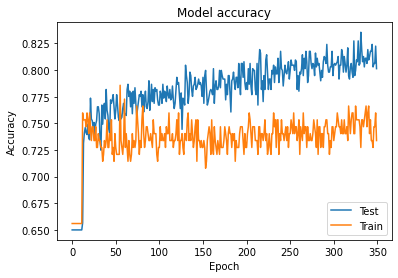

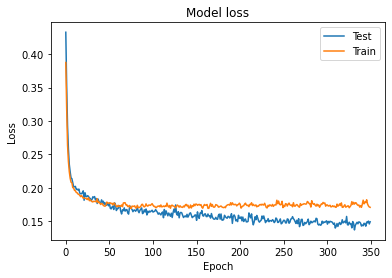

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Train'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Train'], loc='upper right')
plt.show()

In [13]:
#CNN: 1 convolution layer - 1 Pooling - MLP  "avec activation tanh"

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D
from keras import regularizers
import keras
from sklearn.model_selection import cross_val_score

model_cnn = Sequential()

model_cnn.add(Conv1D(16, kernel_size=2, activation='tanh', input_shape=(8,1), data_format = 'channels_last'))

model_cnn.add(Conv1D(32, kernel_size=2, strides=1, activation='tanh'))
model_cnn.add(Conv1D(32, kernel_size=2, strides=1, activation='tanh'))
model_cnn.add(MaxPooling1D(pool_size=2, padding='same'))
model_cnn.add(Flatten())
model_cnn.add(Dense(3, kernel_regularizer=regularizers.l2(0.04), activation='tanh'))
model_cnn.add(Dense(1, kernel_regularizer=regularizers.l2(0.02), activation='sigmoid'))

model_cnn.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

history=model_cnn.fit(X_train, y_train, batch_size=10, epochs=100,validation_data=(X_test, y_test))
    
loss, accuracy = model_cnn.evaluate(X_test, y_test, batch_size=None, verbose=1)
print("Test Accuracy: {:.4f}".format(accuracy))

Epoch 1/100
62/62 [==============================] - 1s 21ms/step - loss: 0.4124 - accuracy: 0.7231 - val_loss: 0.3513 - val_accuracy: 0.7143
Epoch 2/100
62/62 [==============================] - 1s 10ms/step - loss: 0.3052 - accuracy: 0.7704 - val_loss: 0.2863 - val_accuracy: 0.7273
Epoch 3/100
62/62 [==============================] - 1s 10ms/step - loss: 0.2565 - accuracy: 0.7769 - val_loss: 0.2515 - val_accuracy: 0.7273
Epoch 4/100
62/62 [==============================] - 1s 9ms/step - loss: 0.2287 - accuracy: 0.7687 - val_loss: 0.2329 - val_accuracy: 0.7208
Epoch 5/100
62/62 [==============================] - 1s 9ms/step - loss: 0.2156 - accuracy: 0.7687 - val_loss: 0.2200 - val_accuracy: 0.7403
Epoch 6/100
62/62 [==============================] - 1s 11ms/step - loss: 0.2053 - accuracy: 0.7818 - val_loss: 0.2134 - val_accuracy: 0.7532
Epoch 7/100
62/62 [==============================] - 1s 12ms/step - loss: 0.2004 - accuracy: 0.7785 - val_loss: 0.2085 - val_accuracy: 0.7403
Epoch 8/

62/62 [==============================] - 1s 10ms/step - loss: 0.1763 - accuracy: 0.8078 - val_loss: 0.1938 - val_accuracy: 0.7338
Epoch 59/100
62/62 [==============================] - 1s 10ms/step - loss: 0.1743 - accuracy: 0.8046 - val_loss: 0.2042 - val_accuracy: 0.7338
Epoch 60/100
62/62 [==============================] - 1s 10ms/step - loss: 0.1766 - accuracy: 0.8029 - val_loss: 0.1976 - val_accuracy: 0.7208
Epoch 61/100
62/62 [==============================] - 1s 9ms/step - loss: 0.1758 - accuracy: 0.7997 - val_loss: 0.1984 - val_accuracy: 0.7208
Epoch 62/100
62/62 [==============================] - 1s 9ms/step - loss: 0.1761 - accuracy: 0.7980 - val_loss: 0.1990 - val_accuracy: 0.7143
Epoch 63/100
62/62 [==============================] - 1s 9ms/step - loss: 0.1752 - accuracy: 0.8013 - val_loss: 0.1956 - val_accuracy: 0.7143
Epoch 64/100
62/62 [==============================] - 1s 9ms/step - loss: 0.1742 - accuracy: 0.7997 - val_loss: 0.1938 - val_accuracy: 0.7143
Epoch 65/100
62/

In [14]:
#CNN: 1 convolution layer - 1 Pooling - MLP  "avec sgd optimizer"

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D
from keras import regularizers
import keras
from sklearn.model_selection import cross_val_score

model_cnn = Sequential()

model_cnn.add(Conv1D(16, kernel_size=2, activation='relu', input_shape=(8,1), data_format = 'channels_last'))

model_cnn.add(Conv1D(32, kernel_size=2, strides=1, activation='relu'))
model_cnn.add(Conv1D(32, kernel_size=2, strides=1, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=2, padding='same'))
model_cnn.add(Flatten())
model_cnn.add(Dense(3, kernel_regularizer=regularizers.l2(0.04), activation='relu'))

model_cnn.add(Dense(1, kernel_regularizer=regularizers.l2(0.02), activation='sigmoid'))

model_cnn.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])

history=model_cnn.fit(X_train, y_train, batch_size=10, epochs=350,validation_data=(X_test, y_test))
    
loss, accuracy = model_cnn.evaluate(X_test, y_test, batch_size=None, verbose=1)
print("Test Accuracy: {:.4f}".format(accuracy))

Epoch 1/350
62/62 [==============================] - 1s 19ms/step - loss: 0.5018 - accuracy: 0.6107 - val_loss: 0.4855 - val_accuracy: 0.6558
Epoch 2/350
62/62 [==============================] - 1s 9ms/step - loss: 0.4716 - accuracy: 0.6498 - val_loss: 0.4584 - val_accuracy: 0.6558
Epoch 3/350
62/62 [==============================] - 1s 9ms/step - loss: 0.4466 - accuracy: 0.6498 - val_loss: 0.4353 - val_accuracy: 0.6558
Epoch 4/350
62/62 [==============================] - 1s 8ms/step - loss: 0.4251 - accuracy: 0.6498 - val_loss: 0.4150 - val_accuracy: 0.6558
Epoch 5/350
62/62 [==============================] - 1s 8ms/step - loss: 0.4061 - accuracy: 0.6498 - val_loss: 0.3970 - val_accuracy: 0.6558
Epoch 6/350
62/62 [==============================] - 1s 9ms/step - loss: 0.3891 - accuracy: 0.6498 - val_loss: 0.3810 - val_accuracy: 0.6558
Epoch 7/350
62/62 [==============================] - 1s 9ms/step - loss: 0.3740 - accuracy: 0.6498 - val_loss: 0.3665 - val_accuracy: 0.6558
Epoch 8/350


Epoch 58/350
62/62 [==============================] - 1s 8ms/step - loss: 0.2208 - accuracy: 0.6612 - val_loss: 0.2194 - val_accuracy: 0.6688
Epoch 59/350
62/62 [==============================] - 1s 8ms/step - loss: 0.2203 - accuracy: 0.6596 - val_loss: 0.2189 - val_accuracy: 0.6688
Epoch 60/350
62/62 [==============================] - 1s 8ms/step - loss: 0.2198 - accuracy: 0.6678 - val_loss: 0.2184 - val_accuracy: 0.6753
Epoch 61/350
62/62 [==============================] - 1s 9ms/step - loss: 0.2193 - accuracy: 0.6678 - val_loss: 0.2179 - val_accuracy: 0.6753
Epoch 62/350
62/62 [==============================] - 1s 9ms/step - loss: 0.2187 - accuracy: 0.6743 - val_loss: 0.2174 - val_accuracy: 0.6753
Epoch 63/350
62/62 [==============================] - 1s 9ms/step - loss: 0.2182 - accuracy: 0.6840 - val_loss: 0.2169 - val_accuracy: 0.6818
Epoch 64/350
62/62 [==============================] - 1s 9ms/step - loss: 0.2177 - accuracy: 0.6840 - val_loss: 0.2164 - val_accuracy: 0.7013
Epoch 

62/62 [==============================] - 1s 12ms/step - loss: 0.1952 - accuracy: 0.7655 - val_loss: 0.1997 - val_accuracy: 0.7468
Epoch 116/350
62/62 [==============================] - 1s 10ms/step - loss: 0.1948 - accuracy: 0.7638 - val_loss: 0.1997 - val_accuracy: 0.7468
Epoch 117/350
62/62 [==============================] - 1s 10ms/step - loss: 0.1946 - accuracy: 0.7622 - val_loss: 0.1996 - val_accuracy: 0.7468
Epoch 118/350
62/62 [==============================] - 1s 8ms/step - loss: 0.1942 - accuracy: 0.7590 - val_loss: 0.1987 - val_accuracy: 0.7468
Epoch 119/350
62/62 [==============================] - 1s 8ms/step - loss: 0.1940 - accuracy: 0.7590 - val_loss: 0.1983 - val_accuracy: 0.7468
Epoch 120/350
62/62 [==============================] - 1s 10ms/step - loss: 0.1935 - accuracy: 0.7655 - val_loss: 0.1987 - val_accuracy: 0.7468
Epoch 121/350
62/62 [==============================] - 1s 9ms/step - loss: 0.1934 - accuracy: 0.7573 - val_loss: 0.1984 - val_accuracy: 0.7468
Epoch 122

Epoch 172/350
62/62 [==============================] - 1s 8ms/step - loss: 0.1837 - accuracy: 0.7655 - val_loss: 0.1899 - val_accuracy: 0.7468
Epoch 173/350
62/62 [==============================] - 1s 8ms/step - loss: 0.1835 - accuracy: 0.7720 - val_loss: 0.1894 - val_accuracy: 0.7532
Epoch 174/350
62/62 [==============================] - 1s 8ms/step - loss: 0.1835 - accuracy: 0.7655 - val_loss: 0.1893 - val_accuracy: 0.7532
Epoch 175/350
62/62 [==============================] - 0s 8ms/step - loss: 0.1831 - accuracy: 0.7736 - val_loss: 0.1893 - val_accuracy: 0.7532
Epoch 176/350
62/62 [==============================] - 0s 8ms/step - loss: 0.1831 - accuracy: 0.7736 - val_loss: 0.1889 - val_accuracy: 0.7532
Epoch 177/350
62/62 [==============================] - 0s 8ms/step - loss: 0.1831 - accuracy: 0.7671 - val_loss: 0.1886 - val_accuracy: 0.7532
Epoch 178/350
62/62 [==============================] - 1s 8ms/step - loss: 0.1829 - accuracy: 0.7687 - val_loss: 0.1886 - val_accuracy: 0.7532

Epoch 229/350
62/62 [==============================] - 1s 9ms/step - loss: 0.1775 - accuracy: 0.7687 - val_loss: 0.1837 - val_accuracy: 0.7403
Epoch 230/350
62/62 [==============================] - 1s 8ms/step - loss: 0.1768 - accuracy: 0.7638 - val_loss: 0.1874 - val_accuracy: 0.7403
Epoch 231/350
62/62 [==============================] - 1s 8ms/step - loss: 0.1777 - accuracy: 0.7769 - val_loss: 0.1846 - val_accuracy: 0.7532
Epoch 232/350
62/62 [==============================] - 1s 11ms/step - loss: 0.1776 - accuracy: 0.7736 - val_loss: 0.1832 - val_accuracy: 0.7468
Epoch 233/350
62/62 [==============================] - 1s 13ms/step - loss: 0.1773 - accuracy: 0.7704 - val_loss: 0.1828 - val_accuracy: 0.7597
Epoch 234/350
62/62 [==============================] - 1s 12ms/step - loss: 0.1777 - accuracy: 0.7655 - val_loss: 0.1838 - val_accuracy: 0.7468
Epoch 235/350
62/62 [==============================] - 1s 14ms/step - loss: 0.1770 - accuracy: 0.7736 - val_loss: 0.1828 - val_accuracy: 0.

62/62 [==============================] - 1s 13ms/step - loss: 0.1744 - accuracy: 0.7769 - val_loss: 0.1796 - val_accuracy: 0.7532
Epoch 286/350
62/62 [==============================] - 1s 11ms/step - loss: 0.1751 - accuracy: 0.7638 - val_loss: 0.1800 - val_accuracy: 0.7532
Epoch 287/350
62/62 [==============================] - 1s 11ms/step - loss: 0.1744 - accuracy: 0.7687 - val_loss: 0.1800 - val_accuracy: 0.7597
Epoch 288/350
62/62 [==============================] - 1s 10ms/step - loss: 0.1745 - accuracy: 0.7785 - val_loss: 0.1798 - val_accuracy: 0.7468
Epoch 289/350
62/62 [==============================] - 1s 11ms/step - loss: 0.1738 - accuracy: 0.7720 - val_loss: 0.1803 - val_accuracy: 0.7468
Epoch 290/350
62/62 [==============================] - 1s 11ms/step - loss: 0.1736 - accuracy: 0.7818 - val_loss: 0.1811 - val_accuracy: 0.7468
Epoch 291/350
62/62 [==============================] - 1s 12ms/step - loss: 0.1744 - accuracy: 0.7752 - val_loss: 0.1795 - val_accuracy: 0.7532
Epoch 

62/62 [==============================] - 1s 9ms/step - loss: 0.1726 - accuracy: 0.7801 - val_loss: 0.1770 - val_accuracy: 0.7662
Epoch 342/350
62/62 [==============================] - 1s 9ms/step - loss: 0.1720 - accuracy: 0.7769 - val_loss: 0.1764 - val_accuracy: 0.7727
Epoch 343/350
62/62 [==============================] - 1s 10ms/step - loss: 0.1723 - accuracy: 0.7736 - val_loss: 0.1769 - val_accuracy: 0.7532
Epoch 344/350
62/62 [==============================] - 1s 9ms/step - loss: 0.1722 - accuracy: 0.7850 - val_loss: 0.1765 - val_accuracy: 0.7727
Epoch 345/350
62/62 [==============================] - 1s 9ms/step - loss: 0.1714 - accuracy: 0.7785 - val_loss: 0.1773 - val_accuracy: 0.7597
Epoch 346/350
62/62 [==============================] - 1s 8ms/step - loss: 0.1719 - accuracy: 0.7655 - val_loss: 0.1766 - val_accuracy: 0.7727
Epoch 347/350
62/62 [==============================] - 1s 8ms/step - loss: 0.1716 - accuracy: 0.7801 - val_loss: 0.1768 - val_accuracy: 0.7597
Epoch 348/35

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D
from keras import regularizers
import keras
from sklearn.model_selection import cross_val_score
model_cnn = Sequential()
#step convolution
model_cnn.add(Conv1D(10, kernel_size=2, activation='relu', input_shape=(8,1), data_format = 'channels_last'))
#step 2 pooling
model_cnn.add(MaxPooling1D(pool_size=1, padding='same'))
#step 3 flattening
model_cnn.add(Flatten())# partie de MLP
# step 4 full connection
model_cnn.add(Dense(26, input_dim=26, kernel_regularizer=regularizers.l2(0.04), activation='relu'))
model_cnn.add(Dense(1, kernel_regularizer=regularizers.l2(0.02), activation='sigmoid'))
# compiling CNN
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#train CNN
history=model_cnn.fit(X_train, y_train, batch_size=10, epochs=300,validation_data=(X_test, y_test))

    
loss, accuracy = model_cnn.evaluate(X_test, y_test, batch_size=None, verbose=1)
print("Test Accuracy: {:.4f}".format(accuracy))

Epoch 1/300
62/62 [==============================] - 1s 17ms/step - loss: 1.7778 - accuracy: 0.6678 - val_loss: 1.3863 - val_accuracy: 0.7987
Epoch 2/300
62/62 [==============================] - 0s 7ms/step - loss: 1.1706 - accuracy: 0.7590 - val_loss: 0.9607 - val_accuracy: 0.7727
Epoch 3/300
62/62 [==============================] - 0s 7ms/step - loss: 0.8578 - accuracy: 0.7655 - val_loss: 0.7474 - val_accuracy: 0.7727
Epoch 4/300
62/62 [==============================] - 0s 7ms/step - loss: 0.7055 - accuracy: 0.7671 - val_loss: 0.6460 - val_accuracy: 0.7792
Epoch 5/300
62/62 [==============================] - 0s 7ms/step - loss: 0.6286 - accuracy: 0.7704 - val_loss: 0.6027 - val_accuracy: 0.7403
Epoch 6/300
62/62 [==============================] - 0s 7ms/step - loss: 0.5912 - accuracy: 0.7704 - val_loss: 0.5734 - val_accuracy: 0.7468
Epoch 7/300
62/62 [==============================] - 0s 7ms/step - loss: 0.5715 - accuracy: 0.7752 - val_loss: 0.5550 - val_accuracy: 0.7468
Epoch 8/300


62/62 [==============================] - 0s 8ms/step - loss: 0.5065 - accuracy: 0.7752 - val_loss: 0.5110 - val_accuracy: 0.7532
Epoch 59/300
62/62 [==============================] - 1s 8ms/step - loss: 0.5044 - accuracy: 0.7818 - val_loss: 0.5083 - val_accuracy: 0.7727
Epoch 60/300
62/62 [==============================] - 0s 7ms/step - loss: 0.5051 - accuracy: 0.7834 - val_loss: 0.5074 - val_accuracy: 0.7792
Epoch 61/300
62/62 [==============================] - 0s 8ms/step - loss: 0.5038 - accuracy: 0.7883 - val_loss: 0.5036 - val_accuracy: 0.7662
Epoch 62/300
62/62 [==============================] - 0s 7ms/step - loss: 0.5050 - accuracy: 0.7752 - val_loss: 0.5055 - val_accuracy: 0.7727
Epoch 63/300
62/62 [==============================] - 0s 7ms/step - loss: 0.5030 - accuracy: 0.7801 - val_loss: 0.5052 - val_accuracy: 0.7597
Epoch 64/300
62/62 [==============================] - 1s 10ms/step - loss: 0.5053 - accuracy: 0.7801 - val_loss: 0.5016 - val_accuracy: 0.7662
Epoch 65/300
62/62

62/62 [==============================] - 0s 7ms/step - loss: 0.4956 - accuracy: 0.7785 - val_loss: 0.5010 - val_accuracy: 0.7662
Epoch 116/300
62/62 [==============================] - 0s 7ms/step - loss: 0.4907 - accuracy: 0.7899 - val_loss: 0.4968 - val_accuracy: 0.7792
Epoch 117/300
62/62 [==============================] - 0s 6ms/step - loss: 0.4927 - accuracy: 0.7818 - val_loss: 0.4964 - val_accuracy: 0.7727
Epoch 118/300
62/62 [==============================] - 0s 6ms/step - loss: 0.4943 - accuracy: 0.7769 - val_loss: 0.4971 - val_accuracy: 0.7662
Epoch 119/300
62/62 [==============================] - 0s 7ms/step - loss: 0.4931 - accuracy: 0.7801 - val_loss: 0.4988 - val_accuracy: 0.7792
Epoch 120/300
62/62 [==============================] - 0s 6ms/step - loss: 0.4895 - accuracy: 0.7899 - val_loss: 0.4968 - val_accuracy: 0.7792
Epoch 121/300
62/62 [==============================] - 0s 6ms/step - loss: 0.4913 - accuracy: 0.7850 - val_loss: 0.4979 - val_accuracy: 0.7727
Epoch 122/300

62/62 [==============================] - 0s 7ms/step - loss: 0.4852 - accuracy: 0.7785 - val_loss: 0.4991 - val_accuracy: 0.7532
Epoch 173/300
62/62 [==============================] - 0s 7ms/step - loss: 0.4858 - accuracy: 0.7899 - val_loss: 0.4957 - val_accuracy: 0.7662
Epoch 174/300
62/62 [==============================] - ETA: 0s - loss: 0.4838 - accuracy: 0.77 - 0s 7ms/step - loss: 0.4885 - accuracy: 0.7720 - val_loss: 0.4902 - val_accuracy: 0.7792
Epoch 175/300
62/62 [==============================] - 0s 7ms/step - loss: 0.4836 - accuracy: 0.7834 - val_loss: 0.4896 - val_accuracy: 0.7792
Epoch 176/300
62/62 [==============================] - 0s 7ms/step - loss: 0.4834 - accuracy: 0.7834 - val_loss: 0.4907 - val_accuracy: 0.7597
Epoch 177/300
62/62 [==============================] - 0s 7ms/step - loss: 0.4870 - accuracy: 0.7818 - val_loss: 0.5000 - val_accuracy: 0.7727
Epoch 178/300
62/62 [==============================] - 0s 7ms/step - loss: 0.4878 - accuracy: 0.7687 - val_loss: 0

Epoch 229/300
62/62 [==============================] - 0s 7ms/step - loss: 0.4797 - accuracy: 0.7834 - val_loss: 0.4909 - val_accuracy: 0.7792
Epoch 230/300
62/62 [==============================] - 0s 8ms/step - loss: 0.4779 - accuracy: 0.7899 - val_loss: 0.4903 - val_accuracy: 0.7792
Epoch 231/300
62/62 [==============================] - 1s 9ms/step - loss: 0.4880 - accuracy: 0.7801 - val_loss: 0.4945 - val_accuracy: 0.7792
Epoch 232/300
62/62 [==============================] - 1s 12ms/step - loss: 0.4802 - accuracy: 0.7752 - val_loss: 0.4943 - val_accuracy: 0.7727
Epoch 233/300
62/62 [==============================] - 1s 10ms/step - loss: 0.4858 - accuracy: 0.7769 - val_loss: 0.4868 - val_accuracy: 0.7857
Epoch 234/300
62/62 [==============================] - 1s 11ms/step - loss: 0.4795 - accuracy: 0.7883 - val_loss: 0.4879 - val_accuracy: 0.7792
Epoch 235/300
62/62 [==============================] - 1s 8ms/step - loss: 0.4786 - accuracy: 0.7850 - val_loss: 0.5048 - val_accuracy: 0.7

62/62 [==============================] - 0s 8ms/step - loss: 0.4762 - accuracy: 0.7850 - val_loss: 0.4926 - val_accuracy: 0.7662
Epoch 287/300
62/62 [==============================] - 0s 7ms/step - loss: 0.4776 - accuracy: 0.7883 - val_loss: 0.4902 - val_accuracy: 0.7727
Epoch 288/300
62/62 [==============================] - 0s 8ms/step - loss: 0.4767 - accuracy: 0.7834 - val_loss: 0.4910 - val_accuracy: 0.7792
Epoch 289/300
62/62 [==============================] - 1s 8ms/step - loss: 0.4763 - accuracy: 0.7818 - val_loss: 0.4928 - val_accuracy: 0.7727
Epoch 290/300
62/62 [==============================] - 1s 8ms/step - loss: 0.4771 - accuracy: 0.7769 - val_loss: 0.4913 - val_accuracy: 0.7727
Epoch 291/300
62/62 [==============================] - 1s 9ms/step - loss: 0.4750 - accuracy: 0.7834 - val_loss: 0.4932 - val_accuracy: 0.7857
Epoch 292/300
62/62 [==============================] - 1s 9ms/step - loss: 0.4759 - accuracy: 0.7818 - val_loss: 0.4902 - val_accuracy: 0.7727
Epoch 293/300